# Predicting key factors of USA health insurance cost

The dataset can be obtained from https://www.kaggle.com/mirichoi0218/insurance
    
To handle the data (a table in csv format), we will use the pandas library for Python. 
Useful tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Introduction to `pandas`

### Importing the database

In [34]:
# Importing the csv data
data = pd.read_csv("./Data/insurance.csv")

Some information on the imported database can be printed using the commands `head()`, `describe()` and `info()`

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see, the table 1338 entries (rows) and 7 columns named
- age (int)
- sex (object)
- bmi (float): body mass index
- children (int)
- smoker (object)
- region (object): the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges (charges): Individual medical costs billed by health insurance

### Replacing text by numerical data

In [38]:
data = data.replace({'male': 1, 'female': 2, 'no': 0, 'yes': 1})  # for sex and smoker columns
data = data.replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Splitting the dataset between train and test data

We will split the dataset between the training dataset `train` and the testing dataset `test`.

The goal will be to find the best possible prediction of the medical cost given the other variables (age, sex...). To test how good the prediction is, we wil use the training set. 

In [39]:
train, test = train_test_split(data, test_size=0.2)

### Plotting the data

You can conveniently plot the data with one the following methods. 

<AxesSubplot:xlabel='age', ylabel='charges'>

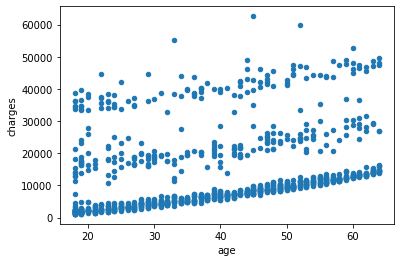

In [40]:
# plot applied to the pandas object
train.plot.scatter('age', 'charges')

In [ ]:
# plot after transforming data into numpy arrays
x = np.array(train["age"])
y = np.array(train["charges"])
plt.scatter(x, y)
plt.show()

Pair-wise correlations can be computed with the function `corr()`. 
Large positive or negative correlations with the column `charges` indicate that the variable is an important factor in determining the price of medical cost. 

In [41]:
train.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.002479,0.130905,0.040701,-0.023626,0.005759,0.307285
sex,0.002479,1.000000,-0.055257,-0.022892,-0.081348,0.019832,-0.067661
bmi,0.130905,-0.055257,1.000000,0.033978,-0.029803,-0.260941,0.178203
children,0.040701,-0.022892,0.033978,1.000000,0.010650,-0.014188,0.074900
smoker,-0.023626,-0.081348,-0.029803,0.010650,1.000000,-0.029913,0.782802
region,0.005759,0.019832,-0.260941,-0.014188,-0.029913,1.000000,-0.035123
charges,0.307285,-0.067661,0.178203,0.074900,0.782802,-0.035123,1.000000


From these values, we see that the three key factors are 
- age
- bmi
- smoker

## Linear regression with one variable

### Plotting

### Question 1
Plot how the medical cost varies as a function of other vaiables and see whether you can spot the correlations evidenced with the function `corr()`. 

In [ ]:
# your answer here

### Gradient descent algorithm

We want to find a linear regression between x = age and y = charges.

The linear regression consists in the hypothesis

$$h_\theta (x) = \theta_0 + \theta_1 x$$

with the cost function

$$J(\theta_0, \theta_1) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$$

The iterative procedure of the gradient descent algorithm is then 

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

with $\alpha$ the learning parameter and 

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x^{(i)}$$

### Question 2
- Complete the following code to implement a gradient descent algorithm
- Check if the learning converges for different values of $\alpha$ (a plot of J as a function of t may help)

t 0   J 73483428.19581729 theta0, theta1 1004.2654942511859 379.53101953071206
t 1   J 69307691.5394465 theta0, theta1 1001.4726640145598 246.48328569997355
t 2   J 67014614.59989345 theta0, theta1 1003.91028345463 345.06848714751357
t 3   J 65755378.15770641 theta0, theta1 1002.4718960796923 272.00473415190964
t 4   J 65063863.09835934 theta0, theta1 1003.9057380299251 326.1394898826775
t 5   J 64684105.579437494 theta0, theta1 1003.2111055770555 286.0152366104139
t 6   J 64475546.06029459 theta0, theta1 1004.0937134165196 315.740552131528
t 7   J 64360997.91847517 theta0, theta1 1003.8074837741827 293.70463911328557
t 8   J 64298075.025945805 theta0, theta1 1004.3873663943041 310.02579744260925
t 9   J 64263501.5378442 theta0, theta1 1004.3253848902339 297.92288471557845
t 10   J 64244495.797076486 theta0, theta1 1004.7390080376396 306.88330788896064
t 11   J 64234038.9066252 theta0, theta1 1004.8001482992294 300.23498620522105
t 12   J 64228276.52155035 theta0, theta1 1005.122450542

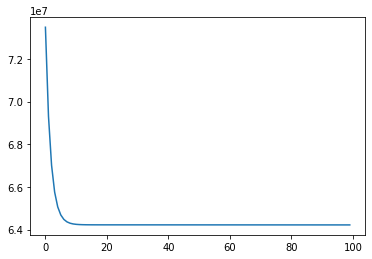

In [43]:
T = 100  # number of steps
alpha = 0.001  # learning parameter
theta0 = 1000.  # initial value
theta1 = 200.  # initial value
N = len(x)  
Jtable = []

#for t in range(T):
#    for i in range(N):
for t in range(T):
    J = 0
    dJ0 = 0
    dJ1 = 0
    for i in range(N):
        h_minus_y = theta0 + theta1 * x[i] - y[i]
        J += h_minus_y**2 / (2 * N)
        dJ0 += h_minus_y /N
        dJ1 += h_minus_y * x[i] /N
    theta0 -= alpha * dJ0
    theta1 -= alpha * dJ1
    Jtable.append(J)
    print('t', t, '  J', J,  'theta0, theta1', theta0, theta1)
plt.plot(Jtable)
plt.show()

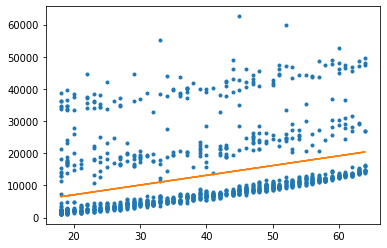

In [44]:
# check the linear regression works
plt.plot(x,y,'.')
plt.plot(x,theta0 + theta1 * x)
plt.show()

### Evaluation of the prediction

In [97]:
def EvaluationError(y, h):
    N = len(y)
    assert len(h)==N, 'The two vectors do not have the same length.'
    J = 0
    for i in range(N_test):
        h_minus_y = h[i] - y[i]
        J += h_minus_y**2 / (2 * N)
    return J

In [98]:
x_test = np.array(test["age"])
y_test = np.array(test["charges"])
h_test = theta0 + theta1 * x_test

print("Mean error J: %.3e" % EvaluationError(y_test, h_test))

Mean error J: 7.807e+07


### Direct method
The parameters $\theta_0$ and $\theta_1$ can also be obtained by the direct method

$\theta_1 = {\langle (x - \langle x \rangle) (y - \langle y \rangle)} \,/\, {\langle(x - \langle x \rangle)^2\rangle}$

$\theta_0 = \langle y \rangle - \theta_1 \langle x \rangle$

### Question 4
Complete the code below to calculate $\theta_0$ and $\theta_1$ directly.

In [46]:
xm = np.mean(x)
ym = np.mean(y)

#theta_1 = ...
#theta_0 = ...

#print("theta_0, theta_1", theta_0, theta_1)

plt.plot(x, y, '.')
#plt.plot(x, theta_0 + theta_1 * x)
plt.show()

NameError: name 'theta_0' is not defined

## Multivariable linear regression

### Rescaled variables

In [87]:
# Input variables
x0 = np.array(train["age"])
x1 = np.array(train["bmi"])
x2 = np.array(train["smoker"])
y = np.array(train["charges"])

x0test = np.array(test["age"])
x1test = np.array(test["bmi"])
x2test = np.array(test["smoker"])
ytest = np.array(test["charges"])

In [88]:
def ToRescaled(x, mean=None, std=None):
    if mean is None:
        mean = np.mean(x)
    if std is None:
        std = np.std(x)
    x_ = (x - mean) / std
    return x_, mean, std
    
def FromRescaled(x_, mean, std):
    x = x_ * std + mean 
    return x

In [89]:
x_0, mean0, std0 = ToRescaled(x0)
x_1, mean1, std1 = ToRescaled(x1)
x_2, mean2, std2 = ToRescaled(x2)
y_ , meany, stdy = ToRescaled(y)

x_0test, _, _ = ToRescaled(x0test, mean0, std0)
x_1test, _, _ = ToRescaled(x1test, mean1, std1)
x_2test, _, _ = ToRescaled(x2test, mean2, std2)
y_test , _, _ = ToRescaled(ytest , meany, stdy)

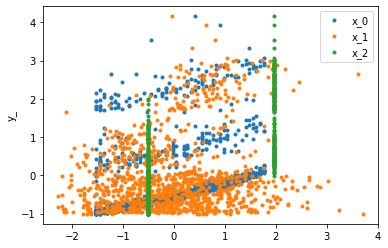

In [91]:
plt.plot(x_0, y_, '.', label="x_0")
plt.plot(x_1, y_, '.', label="x_1")
plt.plot(x_2, y_, '.', label="x_2")
plt.legend()
plt.ylabel('y_')
plt.show()

### Gradient descent

In [71]:
X_ = np.concatenate(
    (np.ones(shape=(len(y),1)), 
     x_0[:, np.newaxis], 
     x_1[:, np.newaxis], 
     x2[:, np.newaxis]), axis=1)

(1070, 4)


t 0   J 0.8617208515353604 theta [0.5889614  0.73871009 0.57707633 0.87496893]
t 10   J 0.2855085985429504 theta [0.08371988 0.43032306 0.27807412 0.95056049]
t 20   J 0.20474573976602192 theta [-0.10654112  0.33758857  0.18929995  1.07031748]
t 30   J 0.1801097557277715 theta [-0.18923329  0.31016957  0.16368577  1.19106704]
t 40   J 0.16560179243355674 theta [-0.23347982  0.30248857  0.1569295   1.30042076]
t 50   J 0.15535339166060025 theta [-0.2625634   0.30072005  0.15570869  1.39595644]
t 60   J 0.14789696476899614 theta [-0.28453928  0.30067229  0.15603342  1.47832227]
t 70   J 0.14244870657064046 theta [-0.30237441  0.30107961  0.15672133  1.54897678]
t 80   J 0.13846535425732534 theta [-0.31730916  0.30156555  0.15743215  1.60946764]
t 90   J 0.13555277638771984 theta [-0.32997544  0.30202354  0.15807644  1.66121801]
t 100   J 0.13342310888191528 theta [-0.34077188  0.30242834  0.15863815  1.70547797]
t 110   J 0.1318659000829194 theta [-0.34999254  0.3027786   0.15912164  1.7

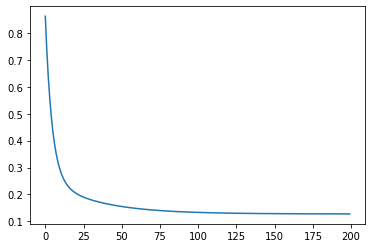

In [78]:
T = 200  # number of steps
alpha = 0.1  # learning parameter
N = X_.shape[0]  # number of data points (1070 here)
M = X_.shape[1]  # number of features/variables (4 here)
theta = np.random.rand(M)
Jtable = []

for t in range(T):
    h_minus_y = np.sum(theta[np.newaxis, :] * X_, axis=1) - y_
    J = np.sum(h_minus_y**2) / (2 * N)
    dJ = np.sum(h_minus_y[:, np.newaxis] * X_, axis=0) / N
    theta -= alpha * dJ
    Jtable.append(J)
    if t % 10==0:
        print('t', t, '  J', J,  'theta', theta)
plt.plot(Jtable)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

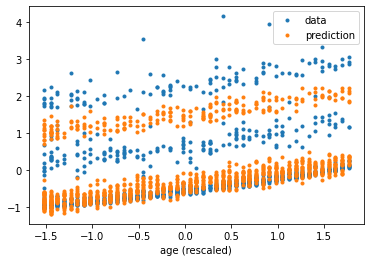

In [84]:
h_ = np.sum(theta[np.newaxis, :] * X_, axis=1)
plt.plot(x_0, y_, '.', label='data')
plt.plot(x_0, h_, '.', label='prediction')
plt.xlabel('age (rescaled)')
plt.legend()
plt.show

In [99]:
X_test = np.concatenate(
    (np.ones(shape=(len(ytest),1)), 
     x_0test[:, np.newaxis], 
     x_1test[:, np.newaxis], 
     x2test[:, np.newaxis]), axis=1)

h_test = np.sum(theta[np.newaxis, :] * X_test, axis=1)
htest = FromRescaled(h_test, meany, stdy)

print("Mean error J: %.3e" % EvaluationError(ytest, htest))

Mean error J: 2.073e+07


### Direct method

In [103]:
XTXinv = np.linalg.inv(np.transpose(X_).dot(X_))

In [106]:
thetadirect = XTXinv.dot(np.transpose(X_).dot(y_))
print(thetadirect)
print(theta)

[-0.4043683   0.30485879  0.16198367  1.96670037]
[-0.3908683   0.30434201  0.16127291  1.91123923]


In [107]:
h_test = np.sum(thetadirect[np.newaxis, :] * X_test, axis=1)
htest = FromRescaled(h_test, meany, stdy)

print("Mean error J: %.3e" % EvaluationError(ytest, htest))

Mean error J: 2.048e+07
